In [1]:
import pandas as pd
import os
from os.path import join, isdir
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [14]:
models = '../models'
optims = []
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_json(join(model_dir, 'optimizer.json'), typ='series')
        optims.append(optim)
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name']
    data['learning_rate'] = optim['learning_rate']
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_.*')
df['experiment'] = '0.001 LR, asl_alphabet_train'
df

,epoch,acc,epoch_time,loss,val_acc,val_loss,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.974266,228.573749,0.081922,0.847931,0.622176,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
1,1,0.972439,200.114905,0.087682,0.827701,0.639547,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
2,2,0.974866,203.326429,0.082131,0.865057,0.533325,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
3,3,0.977663,212.581068,0.074508,0.833678,0.647177,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
4,4,0.977446,187.569030,0.074157,0.858506,0.626244,../models/kaggle_AdaBelief,AdaBelief,0.001,kaggle,"0.001 LR, asl_alphabet_train"
...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.995070,198.133088,0.017280,0.882529,0.654862,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"
6,6,0.995083,179.789485,0.017239,0.883218,0.664942,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"
7,7,0.995543,178.097512,0.016157,0.884828,0.660620,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"
8,8,0.995479,181.355024,0.016407,0.885517,0.653384,../models/kaggle_Adagrad,Adagrad,0.001,kaggle,"0.001 LR, asl_alphabet_train"


In [15]:
for optim in optims:
    name = optim['name']
    optidf = pd.DataFrame.from_records([{'name': name}])
    optidf = df.assign(**optim)
    print()
    print(optidf)

  189.020379  0.017796  0.885517  0.658363   

                     model_dir  optimizer  learning_rate  job_id  \
0   ../models/kaggle_AdaBelief  AdaBelief          0.001  kaggle   
1   ../models/kaggle_AdaBelief  AdaBelief          0.001  kaggle   
2   ../models/kaggle_AdaBelief  AdaBelief          0.001  kaggle   
3   ../models/kaggle_AdaBelief  AdaBelief          0.001  kaggle   
4   ../models/kaggle_AdaBelief  AdaBelief          0.001  kaggle   
..                         ...        ...            ...     ...   
5     ../models/kaggle_Adagrad    Adagrad          0.001  kaggle   
6     ../models/kaggle_Adagrad    Adagrad          0.001  kaggle   
7     ../models/kaggle_Adagrad    Adagrad          0.001  kaggle   
8     ../models/kaggle_Adagrad    Adagrad          0.001  kaggle   
9     ../models/kaggle_Adagrad    Adagrad          0.001  kaggle   

                      experiment  decay       epsilon     lr   rho      name  
0   0.001 LR, asl_alphabet_train    0.0  1.000000e-07  0.

In [16]:
df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'acc': 'max',
      'val_acc': 'max'
   })

epoch  epoch_time  \
experiment                   optimizer learning_rate                      
0.001 LR, asl_alphabet_train AdaBelief 0.001              9  200.771641   
                             Adadelta  0.001              9  195.425183   
                             Adagrad   0.001              9  180.201039   
                             Adam      0.001              9  177.424956   
                             Adamax    0.001              9  167.452217   
                             Nadam     0.001              9  183.086178   
                             RAdam     0.001              9  195.637807   
                             RMSprop   0.001              9  209.278302   
                             SGD       0.001              9  199.007718   
                             Yogi      0.001              9  239.380564   

                                                           acc   val_acc  
experiment                   optimizer learning_rate                      
0.001 LR, asl_alphabet_train AdaBelief 0.001          0.982005  0.881494  
                             Adadelta  0.001          0.980766  0.839540  
                             Adagrad   0.001          0.995543  0.885517  
                             Adam      0.001          0.978301  0.875057  
                             Adamax    0.001          0.996756  0.888966  
                             Nadam     0.001          0.978186  0.881839  
                             RAdam     0.001          0.986169  0.878276  
                             RMSprop   0.001          0.864598  0.788391  
                             SGD       0.001          0.099949  0.041609  
                             Yogi      0.001          0.988455  0.877011

Text(0.5, 1.0, 'ASL classification results per optimizer [LR = 0.001]')

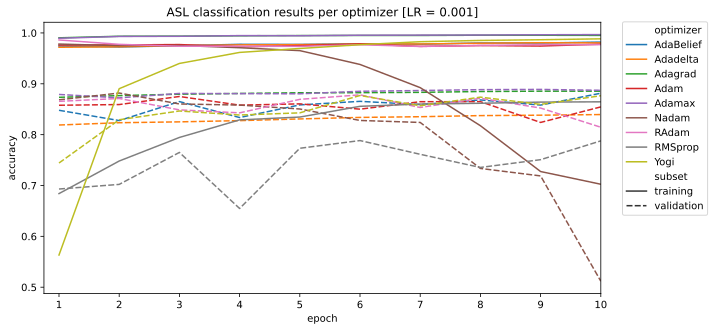

In [17]:
df = df.rename(columns={'acc': 'training', 'val_acc': 'validation'})
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='subset',
                 value_vars=['training', 'validation'],
                 value_name='accuracy')\
             .sort_values('optimizer')
molten = molten[~(molten['optimizer'] == 'SGD')]
molten['epoch'] = molten['epoch'] + 1
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=molten, x='epoch', y='accuracy',
            hue='optimizer', style='subset', ax=ax)
ax.legend(bbox_to_anchor=(1.03, 1.02))
plt.xticks(np.arange(11))
plt.xlim(0.75, 10)
plt.title('ASL classification results per optimizer [LR = 0.001]')

<AxesSubplot:xlabel='epoch', ylabel='epoch_time'>

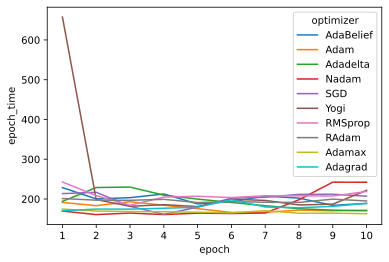

In [18]:
plt.xticks(np.arange(11))
df['epoch']=df['epoch']+1
sns.lineplot(data=df, x='epoch', y='epoch_time', hue='optimizer')

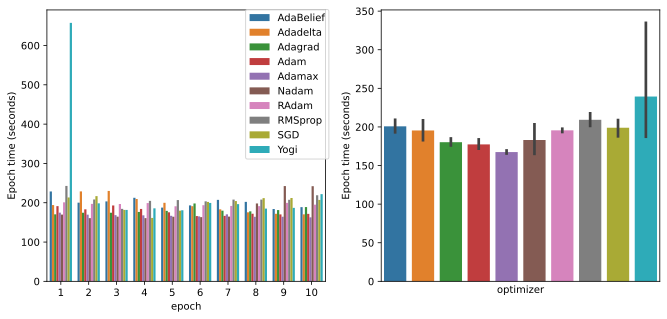

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

sns.barplot(data=df.sort_values('optimizer'),
    x='epoch', y='epoch_time', hue='optimizer',
    ax=ax1)
ax1.set_ylabel('Epoch time (seconds)')
sns.barplot(data=df.sort_values('optimizer'),
    x='optimizer', y='epoch_time',
    ax=ax2)
ax2.set_ylabel('Epoch time (seconds)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax1.legend(bbox_to_anchor=(1.03, 1.02))

Old experiments

Group experiments by job id's

In [8]:
experiments = {
# partition: gpu. 15 hr time limit
    # '18102942': '0.001 LR, Logit + Shuffle bug',
    # '18105570': '0.001 LR, Logit + Shuffle bug',
# partition: gpu. cancelled at 5hr mark
    # '18126401': '0.005 LR, Shuffle bug',
# partition: gpushort. 1:30hr spent
    # '18144187': '0.005 LR, no bugs',
# partition: gpu. 10hr time limit
    '18144207': '0.005 LR',
# partition: gpushort. 2hr time limit
    '18149074': '0.001 LR, ImageNet weights',
# partition: gpushort. 2hr time limit
    '18152456': '0.002 LR, 26.000 samples, batch size 128',
    'kaggle': '0.001 LR, asl_alphabet_train'
}

Combine all results data

In [9]:
models = '../models'
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_csv(join(model_dir, 'optimizer.csv'))
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name'].values[0]
    data['learning_rate'] = optim['learning_rate'].values[0]
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_[0-9]+')
df['experiment'] = df['job_id'].map(experiments.get)
df

,epoch,accuracy,categorical_accuracy,epoch_time,loss,top_k_categorical_accuracy,val_accuracy,val_categorical_accuracy,val_loss,val_top_k_categorical_accuracy,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.960651,0.960651,1187.640418,0.145986,0.998803,0.220177,0.220177,13.694115,0.228467,../models/18089307_4,Nadam,0.001,18089307,None
1,1,0.961517,0.961517,1089.068708,0.138320,0.999613,0.230705,0.230705,13.378916,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
2,2,0.961213,0.961213,1099.932372,0.151486,0.999926,0.230705,0.230705,11.557586,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
3,3,0.960577,0.960577,1099.001507,0.168548,1.000000,0.230705,0.230705,11.017899,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
4,4,0.959988,0.959988,1097.658838,0.181303,0.999926,0.230705,0.230705,12.613845,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.050651,0.050651,442.151199,3.255408,0.239133,0.000000,0.000000,3.279222,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None
6,6,0.051765,0.051765,442.780842,3.255330,0.241722,0.000000,0.000000,3.279520,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None
7,7,0.052861,0.052861,443.881062,3.255239,0.245986,0.000000,0.000000,3.279980,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None
8,8,0.054925,0.054925,443.738344,3.255123,0.250730,0.000000,0.000000,3.280695,0.000166,../models/18102425_0,Adadelta,0.001,18102425,None


In [10]:
df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'accuracy': 'max',
      'val_accuracy': 'max'
   })

epoch  \
experiment                               optimizer          learning_rate          
0.001 LR, ImageNet weights               Adadelta           0.001             69   
                                         Adagrad            0.001             37   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002             11   
                                         RMSprop            0.002             11   
0.005 LR                                 Adadelta           0.005             26   
                                         Adagrad            0.005             79   
                                         Adam               0.005             78   
                                         Adamax             0.005             77   
                                         Ftrl               0.005             17   
                                         Nadam              0.005             73   
                                         RMSprop            0.005             77   
                                         SGD                0.005             32   

                                                                            epoch_time  \
experiment                               optimizer          learning_rate                
0.001 LR, ImageNet weights               Adadelta           0.001           101.109414   
                                         Adagrad            0.001           134.801156   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002           574.731797   
                                         RMSprop            0.002           550.288665   
0.005 LR                                 Adadelta           0.005          1287.715603   
                                         Adagrad            0.005           443.105158   
                                         Adam               0.005           450.070848   
                                         Adamax             0.005           455.344112   
                                         Ftrl               0.005           554.056349   
                                         Nadam              0.005           483.113526   
                                         RMSprop            0.005           452.374973   
                                         SGD                0.005           493.399046   

                                                                           accuracy  \
experiment                               optimizer          learning_rate             
0.001 LR, ImageNet weights               Adadelta           0.001          0.980639   
                                         Adagrad            0.001          0.993847   
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimizer 0.002          1.000000   
                                         RMSprop            0.002          0.997320   
0.005 LR                                 Adadelta           0.005          1.000000   
                                         Adagrad            0.005          1.000000   
                                         Adam               0.005          0.999549   
                                         Adamax             0.005          1.000000   
                                         Ftrl               0.005          0.038778   
                                         Nadam              0.005          0.999751   
                                         RMSprop            0.005          0.968747   
                                         SGD                0.005          1.000000   

                                                                           val_accuracy  
experiment                               optimizer          learning_rate                
0.001 LR, ImageNet weights               Adadelta           0.001              0.039542  
                                         Adagrad            0.001              0.039542  
0.002 LR, 26.000 samples, batch size 128 AdaBeliefOptimize

In [11]:
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='metric',
                 value_vars=['accuracy', 'val_accuracy'],
                 value_name='value')\
             .sort_values('optimizer')
molten

,epoch,optimizer,experiment,metric,value
1773,11,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",val_accuracy,0.041946
126,10,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
125,9,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
124,8,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
123,7,AdaBeliefOptimizer,"0.002 LR, 26.000 samples, batch size 128",accuracy,1.000000
...,...,...,...,...,...
2925,11,SGD,None,val_accuracy,0.000000
2924,10,SGD,None,val_accuracy,0.000000
2923,9,SGD,None,val_accuracy,0.000000
2921,7,SGD,None,val_accuracy,0.000000


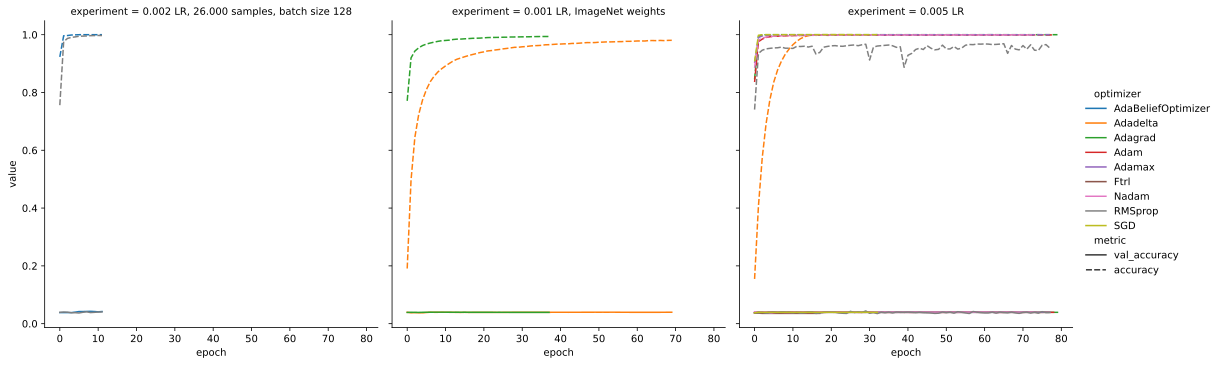

In [12]:
sns.relplot(data=molten, x='epoch', y='value',
    hue='optimizer', kind='line',
    style='metric', col='experiment',
    facet_kws={'sharey': True, 'sharex': True})